# Задание 1
Сравнить точность численного определения интеграла от функции, имеющей разрыв производной (при k=1)
$$ \int_{-1}^{1} |x|^k \, dx $$где показатель степени в подинтегральной функции $k=1$ и $2$.

In [2]:
from integral_functions import trapezoid_method, simpson_method, gauss_method
from matplotlib import pyplot as plt
import numpy as np

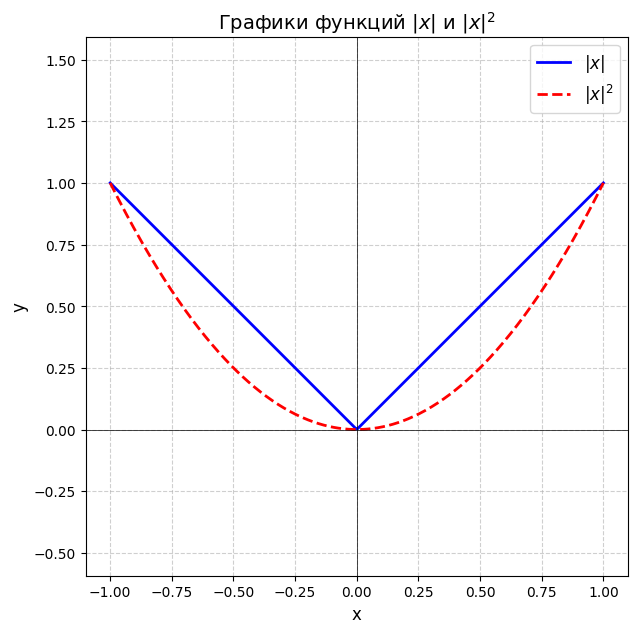

In [3]:
x = np.linspace(-1, 1, 500)

y_abs = np.abs(x)
y_abs_squared = np.abs(x) ** 2

plt.figure(figsize=(7, 7))

plt.plot(x, y_abs, label='$|x|$', color='blue', linewidth=2)

plt.plot(x, y_abs_squared, label='$|x|^2$', color='red', linestyle='--', linewidth=2)

plt.title('Графики функций $|x|$ и $|x|^2$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')
plt.show()

In [4]:
def f_1(x: float) -> float:
    return abs(x)


def f_2(x: float) -> float:
    return abs(x) ** 2


trapezoid_res_1 = trapezoid_method(f_1, -1, 1, 2)
simpson_res_1 = simpson_method(f_1, -1, 1, 2)
gauss_res_1 = gauss_method(f_1, -1, 1, 2)

trapezoid_res_2 = trapezoid_method(f_2, -1, 1, 2)
simpson_res_2 = simpson_method(f_2, -1, 1, 2)
gauss_res_2 = gauss_method(f_2, -1, 1, 2)

print("При k = 1")
print(f"trapezoid method: {trapezoid_res_1}")
print(f"simpson method: {simpson_res_1}")
print(f"gauss method: {gauss_res_1}")
print("---------")
print("При k = 2")
print(f"trapezoid method: {trapezoid_res_2}")
print(f"simpson method: {simpson_res_2}")
print(f"gauss method: {gauss_res_2}")

При k = 1
trapezoid method: 1.0
simpson method: 0.6666666666666666
gauss method: 1.1547005383792508
---------
При k = 2
trapezoid method: 1.0
simpson method: 0.6666666666666666
gauss method: 0.6666666666666662


каких ситуациях теоретический порядок квадратурных формул численного
интегрирования не достигается# Задание 2
Построить алгоритм и программу для вычисления двукратного интеграла
$$
I = \iint_{G} f(x, y) \,dx\,dy
$$
по области G, ограниченной функциями $\phi(x)$ и $\psi(x)$ и прямыми $x=a$ и $x=b$.

Функция $z = f(x, y)$ задана таблично в файле, $\phi(x)=\alpha x^2$, $\psi(x) = \beta x^2$
параметры $\alpha$, $\beta$ задаются пользователем. Для отладки принять $\alpha = 1$, $\beta = 4$, $a = 0$, $b = 2$.

Применить метод последовательного интегрирования с автоматическим выбором шага с использованием по обоим направлениям формулы Гаусса и формулы Симпсона

In [3]:
from function_read import read_function
from double_integral import double_integral

In [22]:
alpha = 1
beta = 4

a = 0
b = 2


def phi(x: float) -> float:
    return alpha * x ** 2


def psi(x: float) -> float:
    return beta * x ** 2


z, x_points, y_points = read_function("data/function.txt")

print("Оба направления по формуле Симпсона по 10 точек:", end=" ")
result_simpson = double_integral(z, x_points, y_points, a, b, phi, psi)
print(result_simpson)

print("Оба направления по формуле Симпсона по 20 точек:", end=" ")
result_simpson = double_integral(z, x_points, y_points, a, b, phi, psi, "simpson", "simpson", 20, 20)
print(result_simpson)

print("Оба направления по формуле Гаусса по 10 точек:", end=" ")
result_gauss = double_integral(z, x_points, y_points, a, b, phi, psi, "gauss", "gauss")
print(result_gauss)

print("Оба направления по формуле Гаусса по 20 точек:", end=" ")
result_gauss = double_integral(z, x_points, y_points, a, b, phi, psi, "gauss", "gauss", 20, 20)
print(result_gauss)

print("По x - Гаусс, по y - Симпсон по 10 точек:", end=" ")
result_3 = double_integral(z, x_points, y_points, a, b, phi, psi, "gauss", "simpson")
print(result_3)

print("По x - Симпсон, по y - Гаусс по 10 точек:", end=" ")
result_4 = double_integral(z, x_points, y_points, a, b, phi, psi, "gauss", "simpson")
print(result_4)

Оба направления по формуле Симпсона по 10 точек: 28.370272151546413
Оба направления по формуле Симпсона по 20 точек: 28.370838419426164
Оба направления по формуле Гаусса по 10 точек: 28.37054186017226
Оба направления по формуле Гаусса по 20 точек: 28.371085722613298
По x - Гаусс, по y - Симпсон по 10 точек: 28.370614351392803
По x - Симпсон, по y - Гаусс по 10 точек: 28.370614351392803
